In [1]:
import numpy as np
import pandas as pd 
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'
print(device)

cuda:0


In [3]:
train_data = pd.read_csv("./abalone_train.data", names=['label','Length','Diameter','Height','WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWight', 'Rings'])
test_data = pd.read_csv("./abalone_test.data", names=['x1','x2','x3','x4','label'])

train_data['label'] = pd.factorize(train_data.label)[0]
test_data['label'] = pd.factorize(test_data.label)[0]

print(train_data)
print(test_data)

      label  Length  Diameter  Height  WholeWeight  ShuckedWeight  \
0         0   0.455     0.365   0.095       0.5140         0.2245   
1         0   0.350     0.265   0.090       0.2255         0.0995   
2         1   0.530     0.420   0.135       0.6770         0.2565   
3         0   0.440     0.365   0.125       0.5160         0.2155   
4         2   0.330     0.255   0.080       0.2050         0.0895   
...     ...     ...       ...     ...          ...            ...   
3448      1   0.565     0.450   0.165       0.8870         0.3700   
3449      0   0.590     0.440   0.135       0.9660         0.4390   
3450      0   0.600     0.475   0.205       1.1760         0.5255   
3451      1   0.625     0.485   0.150       1.0945         0.5310   
3452      0   0.710     0.555   0.195       1.9485         0.9455   

      VisceraWeight  ShellWight  Rings  
0            0.1010      0.1500     15  
1            0.0485      0.0700      7  
2            0.1415      0.2100      9  
3      

In [18]:
train_data = np.asarray(train_data)
test_data = np.asarray(test_data)

train_x = train_data[:,0:4]
print(train_x)
train_y = train_data[:,4]

test_x = test_data[:,0:4]
# print(test_x)
test_y = test_data[:,4]

print(test_y)

train_x = torch.tensor(train_x, dtype=torch.float).to(device)
train_y = torch.tensor(train_y, dtype=torch.long).to(device)
test_x = torch.tensor(test_x, dtype=torch.float).to(device)
test_y = torch.tensor(test_y, dtype=torch.long).to(device)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]
 [5.7 2.8 4.5 1.3]
 [6.3 3.3 4.7 1.6]
 [4.9 2.4 3.3 1. ]
 [6.6 2.9 4.6 1.3]
 [5.2 2.7 3.9 1.4]
 [5.  2.  3.5 1. ]
 [5.9 3.  4.2 1.5]
 [6.  2.2 4.  1. ]
 [6.1 2.9 4.7 1.4]
 [5.6 2.9 3.6 1.3]
 [6.7 3.1 4.4 1.4]
 [5.6 3.  4.5 1.5]
 [5.8 2.7 4.1 1. ]
 [6.2 2.2 4.5 1.5]
 [5.6 2.5 3.9 1.1]
 [6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.9 2.1]
 [6.3 2.9 5.6 1.8]
 [6.5 3.  5.8 2.2]
 [7.6 3.  6.6 2.1]
 [4.9 2.5 4.5 1.7]
 [7.3 2.9 6.3 1.8]
 [6.7 2.5 5.8 1.8]
 [7.2 3.6 6.1 2.5]
 [6.5 3.2 5.1 2. ]
 [6.4 2.7 5.3 1.9]
 [6.8 3.  5.

In [19]:
batch_size = 8

train_ds = TensorDataset(train_x, train_y)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

test_ds = TensorDataset(test_x, test_y)
test_dl = DataLoader(test_ds, batch_size=batch_size)

In [20]:
class LogisticRegression(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(4,32),
            nn.ReLU(),
            nn.Linear(32,32),
            nn.ReLU(),
            nn.Linear(32,3),
        )

    def forward(self, input):
        input = self.linear(input)
        return input

In [21]:
lr_model = LogisticRegression().to(device)
print(lr_model)

loss_func = nn.CrossEntropyLoss()

lr = 1e-5

optimizer = optim.Adam(lr_model.parameters(), lr=lr)

LogisticRegression(
  (linear): Sequential(
    (0): Linear(in_features=4, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=3, bias=True)
  )
)


In [22]:
def accuracy(y_pred, y_true):
    y_pred = torch.argmax(y_pred, dim=1)
    acc = (y_pred == y_true).float().mean()
    return acc

In [23]:
train_acc = []
train_loss = []
test_acc = []
test_loss = []

for epoch in range(1,30001):
    for x, y in train_dl:
        y_pred = lr_model(x)
        loss = loss_func(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        epoch_acc = accuracy(lr_model(train_x), train_y)
        epoch_loss = loss_func(lr_model(train_x), train_y).data

        test_epoch_acc = accuracy(lr_model(test_x), test_y)
        test_epoch_loss = loss_func(lr_model(test_x), test_y).data

        if epoch % 20 == 0:
            print("epoch:%d"%epoch)
            print(f"loss:{epoch_loss.item():.3}, acc:{epoch_acc.item():.3}")
            print(f"test_loss:{test_epoch_loss.item():.3}, test_acc:{test_epoch_acc.item():.3}")
            print('-'*30)

        train_loss.append(epoch_loss.item())
        train_acc.append(epoch_acc.item())
        test_loss.append(test_epoch_loss.item())
        test_acc.append(test_epoch_acc.item())

epoch:20
loss:1.13, acc:0.288
test_loss:1.11, test_acc:0.375
------------------------------
epoch:40
loss:1.12, acc:0.288
test_loss:1.09, test_acc:0.375
------------------------------
epoch:60
loss:1.1, acc:0.288
test_loss:1.08, test_acc:0.375
------------------------------
epoch:80
loss:1.09, acc:0.288
test_loss:1.07, test_acc:0.375
------------------------------
epoch:100
loss:1.08, acc:0.288
test_loss:1.06, test_acc:0.375
------------------------------
epoch:120
loss:1.07, acc:0.237
test_loss:1.05, test_acc:0.375
------------------------------
epoch:140
loss:1.06, acc:0.203
test_loss:1.04, test_acc:0.375
------------------------------
epoch:160
loss:1.05, acc:0.203
test_loss:1.03, test_acc:0.312
------------------------------
epoch:180
loss:1.04, acc:0.203
test_loss:1.02, test_acc:0.281
------------------------------
epoch:200
loss:1.03, acc:0.203
test_loss:1.02, test_acc:0.281
------------------------------
epoch:220
loss:1.02, acc:0.203
test_loss:1.01, test_acc:0.281
-------------

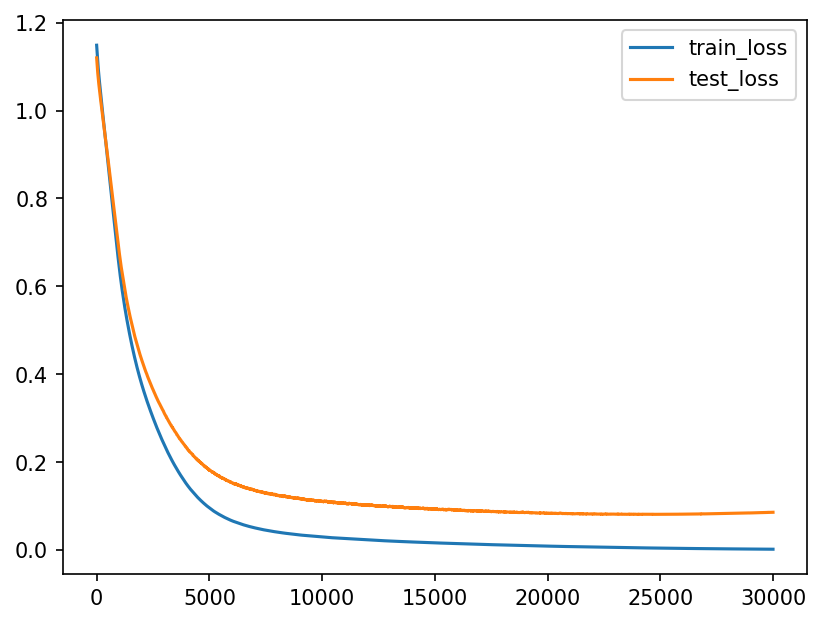

In [26]:
import matplotlib.pyplot as plt

plt.figure(dpi=150)
plt.plot(range(epoch), train_loss, label='train_loss')
plt.plot(range(epoch), test_loss, label='test_loss')
plt.legend()

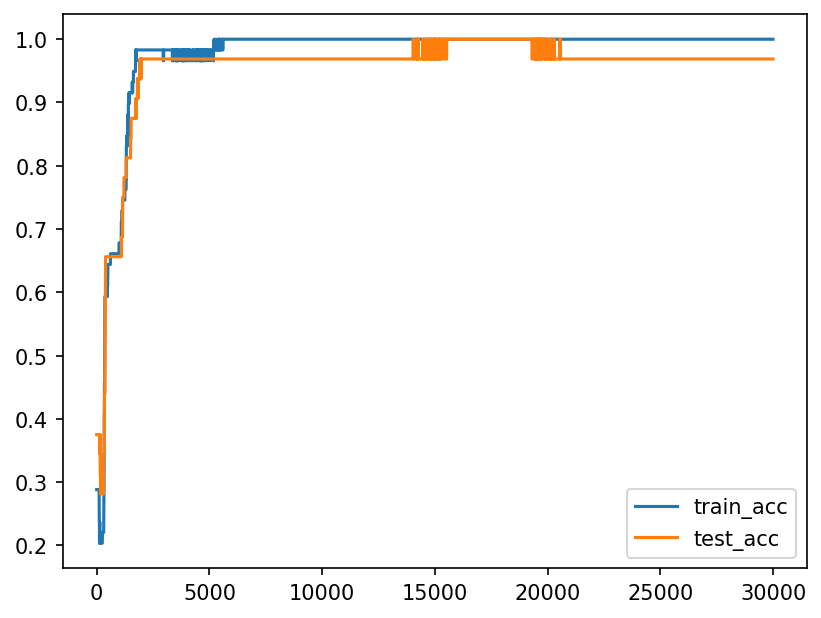

In [27]:
plt.figure(dpi=150)
plt.plot(range(epoch), train_acc, label='train_acc')
plt.plot(range(epoch), test_acc, label='test_acc')
plt.legend()